# Part II - Modelling

In [1]:
# Import libraries

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfVectorizer,
    TfidfTransformer,
)

import nltk

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    roc_curve,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report,
    roc_auc_score,
    accuracy_score,
    plot_roc_curve,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC


import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data/data_vec.csv")

<a id='link7'></a>

## Model Pre-processing

### Stopwords

These are obtained from the EDA in the previous notebook, based on commonly occurring unigrams and bigrams.

Words have also been added based on the results from GridSearchCV. Names of the subreddits have also been included, so as to ensure that our data is not biased.

<a id='link6'></a>

In [3]:
add_stopwords = [
    "solotravel",
    "shoestring",
    "solo",
    "city",
    "country",
    "don",
    "ll",
    "ve",
    "wa",
    "want",
    "week",
    "year",
    "just",
    "day",
    "month",
    "just",
    "like",
    "love",
    "time",
    "travel",
    "way",
    "really",
    "good",
    "get",
    "go",
    "going",
    "would",
    "thank",
    "please",
    "big",
    "feel",
    "xb",
    "soon",
    "anyone",
    "completely",
    "mostly",
    "always",
    "christmas",  # this is taken out because of the period the data was scraped
    "also",
    "else",
    "however",
    "but",
    "make",
    "lot",
    "one",
    "topic",
    "see",
    "know",
    "take",
    "think",
    "need",
    "find",
    "much",
    "idea",
    "need",
    "thing",
    "post",
    "well",
    "use",
    "look",
    "still",
    "trip",
    "could",
    "would",
    "around",
    "keep",
    "bit",
    "amp",
    "place",
    "back",
    "try",
    "help",
    "old",
    "suggestion",
    "recommendation",
    "advice",
    "plan",
    "decide",
    "hi",
    "hey",
    "happen",
    "something",
    "appreciate",
    "experience",
    "people",
    "never",
    "recommend",
    "seem",
]


stopwords = nltk.corpus.stopwords.words("english")
stopwords.extend(add_stopwords)

### Baseline Accuracy

In [4]:
data["subreddit"].value_counts(normalize=True)

0    0.50753
1    0.49247
Name: subreddit, dtype: float64

### Model Preparation

In [5]:
# set X and y
X = data["lemmatized"]
y = data["subreddit"]

In [6]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# check split of y values
y_train.value_counts(normalize=True)

0    0.507533
1    0.492467
Name: subreddit, dtype: float64

### Functions for Modelling

#### For pipeline, gridsearch

In [8]:
# vect inputs to choose from:
# tfidf - tfidfvectorizer
# cvec - countvectorizer

# model inputs to choose from:
# logreg
# nb
# rf
# knn
# svm


def longtime(vect, model, params):

    """train test split"""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    if vect == "cvec":
        if model == "logreg":
            pipeline = Pipeline(
                [
                    ("vect", CountVectorizer(stop_words=stopwords)),
                    ("model", LogisticRegression(random_state=42)),
                ]
            )
            grid = GridSearchCV(
                pipeline,
                params,
                cv=5,
                scoring="roc_auc",
                n_jobs=5,
            )
        elif model == "nb":
            pipeline = Pipeline(
                [
                    ("vect", CountVectorizer(stop_words=stopwords)),
                    ("model", MultinomialNB()),
                ]
            )
            grid = GridSearchCV(pipeline, params, cv=5, scoring="roc_auc", n_jobs=5)
        elif model == "rf":
            pipeline = Pipeline(
                [
                    ("vect", CountVectorizer(stop_words=stopwords)),
                    ("model", RandomForestClassifier(random_state=42)),
                ]
            )
            grid = GridSearchCV(pipeline, params, cv=5, scoring="roc_auc", n_jobs=5)
        elif model == "knn":
            pipeline = Pipeline(
                [
                    ("vect", CountVectorizer(stop_words=stopwords)),
                    ("model", KNeighborsClassifier()),
                ]
            )
            grid = GridSearchCV(pipeline, params, cv=5, scoring="roc_auc", n_jobs=5)
        elif model == "svm":
            pipeline = Pipeline(
                [
                    ("vect", CountVectorizer(stop_words=stopwords)),
                    ("model", SVC(random_state=42)),
                ]
            )
            grid = GridSearchCV(pipeline, params, cv=5, scoring="roc_auc", n_jobs=5)

    elif vect == "tfidf":
        if model == "logreg":
            pipeline = Pipeline(
                [
                    ("vect", TfidfVectorizer(stop_words=stopwords)),
                    ("model", LogisticRegression(random_state=42)),
                ]
            )
            grid = GridSearchCV(pipeline, params, cv=5, scoring="roc_auc", n_jobs=5)
        elif model == "nb":
            pipeline = Pipeline(
                [
                    ("vect", TfidfVectorizer(stop_words=stopwords)),
                    ("model", MultinomialNB()),
                ]
            )
            grid = GridSearchCV(pipeline, params, cv=5, scoring="roc_auc", n_jobs=5)
        elif model == "rf":
            pipeline = Pipeline(
                [
                    ("vect", TfidfVectorizer(stop_words=stopwords)),
                    ("model", RandomForestClassifier(random_state=42)),
                ]
            )
            grid = GridSearchCV(pipeline, params, cv=5, scoring="roc_auc", n_jobs=5)
        elif model == "knn":
            pipeline = Pipeline(
                [
                    ("vect", TfidfVectorizer(stop_words=stopwords)),
                    ("model", KNeighborsClassifier()),
                ]
            )
            grid = GridSearchCV(pipeline, params, cv=5, scoring="roc_auc", n_jobs=5)
        elif model == "svm":
            pipeline = Pipeline(
                [
                    ("vect", TfidfVectorizer(stop_words=stopwords)),
                    ("model", SVC(random_state=42)),
                ]
            )
            grid = GridSearchCV(pipeline, params, cv=5, scoring="roc_auc", n_jobs=5)

    grid.fit(X_train, y_train)
    print(f"For {vect} and {model}:")
    print("")
    print(f"Best parameters are {grid.best_params_}")
    print("----------------")
    print("")
    print(f"Best model accuracy score is {grid.best_score_}")
    print(f"Score on test data is: {grid.score(X_test, y_test)}")
    print("----------------")
    print("")

#### For confusion matrix

In [9]:
def cm(vect, model, X_test, y_test):
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print(classification_report(y_test, y_pred))

    display(
        pd.DataFrame(
            confusion_matrix(y_test, y_pred),
            columns=["predicted solotravel", "predicted shoestring"],
            index=["actual solotravel", "actual shoestring"],
        )
    )

    print(f"ROC/AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"Misclassiciation Rate: {(fp+fn)/(tn+fn+fp+tp)}")

#### For top features

In [37]:
def topwords(vect, model):
    if model == logreg_cvec:
        top_words = pd.DataFrame(
            {
                "words": vect.get_feature_names(),
                "coefficients": np.exp(model.coef_[0]),
            }
        )
        print("Top 20 words for r/solotravel")
        display(top_words.sort_values(by="coefficients", ascending=True).head(20))

        print("Top 20 words for r/shoestring")
        display(top_words.sort_values(by="coefficients", ascending=False).head(20))

    elif model == nb_cvec:
        top_words = pd.DataFrame(
            {"words": vect.get_feature_names(), "coefficients": model.coef_[0]}
        )
        print("Top 20 words for r/solotravel")
        display(top_words.sort_values(by="coefficients", ascending=True).head(20))

        print("Top 20 words for r/shoestring")
        display(top_words.sort_values(by="coefficients", ascending=False).head(20))

    elif model == rf_cvec:
        words = vect.get_feature_names()
        featimpt = model.feature_importances_
        top_words = pd.DataFrame({"words": words, "feature importance": featimpt})
        print("Top 20 words for model")
        sortwords = top_words.sort_values(by="feature importance", ascending=False).head(20)
        sns.barplot(x="feature importance", y="words", data=sortwords,
            label="Total", color="r")

## Modelling

<a id='link4'></a>

Using the function created earlier, we will be modelling on 5 different models, for both CountVectorizer and TFIDFVectorizer. 

For each model, we will first do GridSearchCV to find the optimal parameters, remodel with these optimal parameters, thereafter looking at the top features in our respective models.

The table shows a summary of models we have run. Models highlighted in bold are the final models chosen for evaluation [here](#eval). We have chosen to ignore both models from SVM, as they were severly overfit.

| Model | Count Vectorizer | TFIDF Vectorizer |
| --- | --- | --- |
| Logistic Regression | **Model 1** | Model 2 | 
| Naive-Bayes | **Model 3**  | Model 4  |
| Random Forest | **Model 5**  | Model 6  |
| KNN | Model 7 | **Model 8** |
| SVM | Model 9  | Model 10 |

### Logistic Regression

#### Gridsearch for best parameters

In [11]:
# params = {
#     "vect__max_features": [2500, 3000, 3500, 5000],
#     "vect__min_df": [3, 5, 10],
#     "vect__max_df": [0.9, 0.95, 0.98],
#     "vect__ngram_range": [(1, 1), (1, 2)],
#     "model__C": [0.01, 0.1, 1, 2],
#     "model__max_iter": [2000],
#     "model__solver": ["liblinear", "saga", "lbfgs"],
# }

# # model 1
# longtime("cvec", "logreg", params)

# print("-------------------------")

# # model 2
# longtime("tfidf", "logreg", params)

For cvec and logreg:

Best parameters are {'model__C': 0.01, 'model__max_iter': 2000, 'model__solver': 'saga', 'vect__max_df': 0.9, 'vect__max_features': 5000, 'vect__min_df': 3, 'vect__ngram_range': (1, 2)}


Best model accuracy score is 0.770933815923412

Score on test data is: 0.8049052869663558

-------------------------
For tfidf and logreg:

Best parameters are {'model__C': 0.1, 'model__max_iter': 2000, 'model__solver': 'liblinear', 'vect__max_df': 0.9, 'vect__max_features': 3500, 'vect__min_df': 3, 'vect__ngram_range': (1, 2)}

Best model accuracy score is 0.7853853387874196

Score on test data is: 0.8033502968617472

#### Re-modelling with Best Parameters

We have chosen to remodel Logistic Regression with CountVectorizer (model 1) as it seems to suggest less over fitting. 

When examining the top features, we can see that words like 'cheap' and 'budget' has a large influence on classifying text into r/shoestring. However, words like 'alone' and 'hostel' had lower influences, suggesting that they would belong to the r/solotravel subreddit instead. 

Misclassification rate: 28%

In [12]:
# with TFIDF,
# Train Score: 0.8102636534839924
# Test Score: 0.7180451127819549

cvec_1 = CountVectorizer(
    max_df=0.9, max_features=5000, min_df=3, ngram_range=(1, 2), stop_words=stopwords
)

# transforming X
logreg_X_train = cvec_1.fit_transform(X_train).todense()
logreg_X_test = cvec_1.transform(X_test).todense()

logreg = LogisticRegression(C=0.01, max_iter=2000, solver="saga")
logreg_cvec = logreg.fit(logreg_X_train, y_train)

print("Logistic Regression Model Train Score:", logreg.score(logreg_X_train, y_train))
print("Logistic Regression Model Test Score:", logreg.score(logreg_X_test, y_test))
print("--" * 20)

# examine top features
topwords(cvec_1, logreg_cvec)

# plot cm
cm(cvec_1, logreg_cvec, logreg_X_test, y_test)

Logistic Regression Model Train Score: 0.7961393596986818
Logistic Regression Model Test Score: 0.7236842105263158
----------------------------------------
Top 20 words for r/solotravel


words  coefficients
160       alone      0.761109
1798      first      0.774718
2204     hostel      0.816322
2785       meet      0.826779
3697       safe      0.841670
2970       next      0.884990
2071        guy      0.885482
4462       tour      0.891786
4349   thailand      0.899398
2177       home      0.901079
351   australia      0.907259
4762       wait      0.908887
1176    culture      0.910040
2118       hear      0.910128
2104       hard      0.910671
2562       life      0.911768
2951    nervous      0.913147
2654       long      0.913360
3659       rome      0.915898
3164       part      0.916997

Top 20 words for r/shoestring


words  coefficients
842        cheap      1.427984
628       budget      1.287996
1824      flight      1.171741
1700   expensive      1.143116
1241        deal      1.140035
4390      ticket      1.121011
755          car      1.116870
2864       money      1.105384
732      camping      1.104300
103   affordable      1.102045
2362      island      1.100385
577    boyfriend      1.100316
1927      friend      1.099847
1655    everyone      1.099219
1226        date      1.097463
1996  girlfriend      1.096927
1088        cost      1.096757
4085        stay      1.090179
146      airport      1.088914
1913        free      1.084883

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       270
           1       0.70      0.77      0.73       262

    accuracy                           0.72       532
   macro avg       0.73      0.72      0.72       532
weighted avg       0.73      0.72      0.72       532



predicted solotravel  predicted shoestring
actual solotravel                   183                    87
actual shoestring                    60                   202

ROC/AUC Score: 0.7243850720949957
Misclassiciation Rate: 0.27631578947368424


### Naive Bayes

#### Gridsearch for best parameters

In [13]:
# params = {
#     "vect__max_features": [2500, 3000, 3500],
#     "vect__min_df": [3, 5, 10],
#     "vect__max_df": [0.9, 0.95, 0.98],
#     "vect__ngram_range": [(1, 1), (1, 2)],
#     "model__alpha": [0.5, 1.0, 1.5, 2],
# }

# # model 3
# longtime("cvec", "nb", params)

# print("-------------------------")

# # model 4
# longtime("tfidf", "nb", params)

For cvec and nb:

Best parameters are {'model__alpha': 2, 'vect__max_df': 0.9, 'vect__max_features': 3500, 'vect__min_df': 3, 'vect__ngram_range': (1, 2)}


Best model accuracy score is 0.7804668265684176

Score on test data is: 0.7938083121289227


-------------------------
For tfidf and nb:

Best parameters are {'model__alpha': 2, 'vect__max_df': 0.9, 'vect__max_features': 3500, 'vect__min_df': 3, 'vect__ngram_range': (1, 2)}


Best model accuracy score is 0.7884147728376615

Score on test data is: 0.8100226180378852


#### Re-modelling with Best Parameters

We have chosen to remodel MultinomialNB with CountVectorizer (model 3) as it returned a model that is less overfit, although overfitting is still present. 

Similar to logisitc regression, we can see that words like 'cheap' and 'budget' has a large influence on classifying text into r/shoestring. However, we get an interesting assortment of words for r/solotravel - which are many southeast asian destinations (famously known to be popular amongst backpackers).

Misclassification rate: 27% 

In [14]:
# With TFIDF,
# Train Score: 0.8427495291902072
# Test Score: 0.731203007518797

cvec_2 = CountVectorizer(
    max_df=0.9, max_features=3500, min_df=3, ngram_range=(1, 2), stop_words=stopwords
)

# transforming X
nb_X_train = cvec_2.fit_transform(X_train).todense()
nb_X_test = cvec_2.transform(X_test).todense()

nb = MultinomialNB(alpha=2)
nb_cvec = nb.fit(nb_X_train, y_train)

print("Multinomial NB Model Train Score:", nb.score(nb_X_train, y_train))
print("Multinomial NB Model Test Score:", nb.score(nb_X_test, y_test))
print("--" * 20)

# examine top features
topwords(cvec_2, nb_cvec)

# plot cm
cm(cvec_2, nb_cvec, nb_X_test, y_test)

Multinomial NB Model Train Score: 0.82015065913371
Multinomial NB Model Test Score: 0.7293233082706767
----------------------------------------
Top 20 words for r/solotravel


words  coefficients
856             dynamic    -10.021093
3080  thailand cambodia    -10.021093
1595              kyoto    -10.021093
2237           positive    -10.021093
3380               weed    -10.021093
3078               thai    -10.021093
2510               ring    -10.021093
206             awkward    -10.021093
3075           th leave    -10.021093
876           easy meet    -10.021093
3370            wealthy    -10.021093
1583           kinshasa    -10.021093
2986          sure safe    -10.021093
2987         sure spend    -10.021093
882            economic    -10.021093
1571         kazakhstan    -10.021093
889           education    -10.021093
2859        spend three    -10.021093
3363                wat    -10.021093
520        cinque terre    -10.021093

Top 20 words for r/shoestring


words  coefficients
1108  flight     -4.894157
484    cheap     -4.918182
2904    stay     -5.044359
364   budget     -5.192779
3318   visit     -5.415923
2848   spend     -5.493884
1875   money     -5.584341
1139    food     -5.602252
1129     fly     -5.632836
1181  friend     -5.645336
3440    work     -5.664384
310     book     -5.690359
1966   night     -5.710294
1400  hostel     -5.730633
433      car     -5.737506
1712    long     -5.765480
3119     tip     -5.765480
1414   hotel     -5.779766
3108  ticket     -5.794259
1687    live     -5.823891

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       270
           1       0.72      0.74      0.73       262

    accuracy                           0.73       532
   macro avg       0.73      0.73      0.73       532
weighted avg       0.73      0.73      0.73       532



predicted solotravel  predicted shoestring
actual solotravel                   193                    77
actual shoestring                    67                   195

ROC/AUC Score: 0.72954481198756
Misclassiciation Rate: 0.2706766917293233


### Random Forest

#### Gridsearch for best parameters

In [15]:
# params = {
#     "vect__max_features": [2500, 3000, 3500, 5000],
#     "vect__min_df": [3],
#     "vect__max_df": [0.9, 0.95, 0.98],
#     "vect__ngram_range": [(1, 1), (1, 2)],
#     "model__n_estimators": [300, 400, 500],
#     "model__max_depth": [10, 15, 20],
#     "model__min_samples_leaf": [5, 10, 20],
# }

# # model 5
# longtime("cvec", "rf", params)

# print("-------------------------")

# # model 6
# longtime("tfidf", "rf", params)

For cvec and rf:

Best parameters are {'model__max_depth': 20, 'model__min_samples_leaf': 5, 'model__n_estimators': 500, 'vect__max_df': 0.9, 'vect__max_features': 5000, 'vect__min_df': 3, 'vect__ngram_range': (1, 2)}


Best model accuracy score is 0.7723149146062243

Score on test data is: 0.8044529262086514


-------------------------


For tfidf and rf:

Best parameters are {'model__max_depth': 20, 'model__min_samples_leaf': 5, 'model__n_estimators': 300, 'vect__max_df': 0.9, 'vect__max_features': 3500, 'vect__min_df': 3, 'vect__ngram_range': (1, 2)}


Best model accuracy score is 0.7713562550374056

Score on test data is: 0.8022476675148431


#### Re-modelling With Best Parameters

We have chosen to remodel with Random Forest and CountVectorizer (model 5). This model was slightly less overfit. 

However, with a random forest model, we are unable to see which words had a larger influence on which subreddit. 

The top features only tells us which words were important in determining the splitting of the trees.

Misclassification rate: 26%

Top 20 words for model
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       270
           1       0.72      0.77      0.74       262

    accuracy                           0.74       532
   macro avg       0.74      0.74      0.74       532
weighted avg       0.74      0.74      0.74       532



predicted solotravel  predicted shoestring
actual solotravel                   190                    80
actual shoestring                    60                   202

ROC/AUC Score: 0.7373480350579587
Misclassiciation Rate: 0.2631578947368421
Random Forest Model Train Score: 0.8116760828625236
Random Forest Model Test Score: 0.7368421052631579


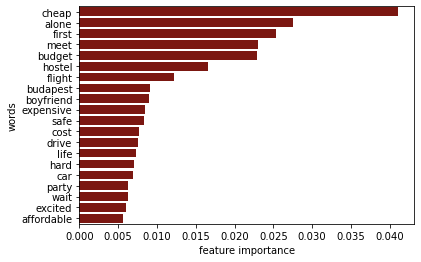

In [38]:
# With TFIDF,
# Train Score: 0.833804143126177
# Test Score: 0.7424812030075187

cvec_3 = CountVectorizer(
    max_df=0.9, max_features=5000, min_df=3, ngram_range=(1, 2), stop_words=stopwords
)

# transforming X
rf_X_train = cvec_3.fit_transform(X_train).todense()
rf_X_test = cvec_3.transform(X_test).todense()

rf = RandomForestClassifier(
    random_state=42, max_depth=20, min_samples_leaf=5, n_estimators=500
)
rf_cvec = rf.fit(rf_X_train, y_train)

# examine top features
topwords(cvec_3, rf_cvec)

# plot cm
cm(cvec_3, rf_cvec, rf_X_test, y_test)

print("Random Forest Model Train Score:", rf.score(rf_X_train, y_train))
print("Random Forest Model Test Score:", rf.score(rf_X_test, y_test))

### KNN

#### Gridsearch for best parameters

In [17]:
# params = {
#     "vect__max_features": [2500, 3000, 3500, 5000],
#     "vect__min_df": [3],
#     "vect__max_df": [0.9, 0.95, 0.98],
#     "vect__ngram_range": [(1, 1), (1, 2)],
#     "model__n_neighbors": [10, 20, 30, 50],
#     "model__leaf_size": [10, 20, 30],
# }

# # model 7
# longtime("cvec", "knn", params)

# print("-------------------------")

# # model 8
# longtime("tfidf", "knn", params)

For cvec and knn:

Best parameters are {'model__leaf_size': 10, 'model__n_neighbors': 50, 'vect__max_df': 0.9, 'vect__max_features': 3000, 'vect__min_df': 3, 'vect__ngram_range': (1, 1)}


Best model accuracy score is 0.6137462831379601

Score on test data is: 0.6496819338422392


-------------------------
For tfidf and knn:

Best parameters are {'model__leaf_size': 10, 'model__n_neighbors': 50, 'vect__max_df': 0.9, 'vect__max_features': 3500, 'vect__min_df': 3, 'vect__ngram_range': (1, 2)}


Best model accuracy score is 0.749399295160617

Score on test data is: 0.76526010743568

#### Re-modelling KNN with best params

We have chosen to remodel KNN with TFIDFVectorizer (model 8) as it returned a higher accuracy score.

However, with the KNN model, we are unable to see which words had higher influence on the model. 

Misclassification rate: 29%

In [18]:
# With CountVect,
# Train Score: 0.5230696798493408
# Test Score: 0.5169172932330827

tfidf_4 = TfidfVectorizer(
    max_df=0.9, max_features=3500, min_df=3, ngram_range=(1, 2), stop_words=stopwords
)

# transforming X
knn_X_train = tfidf_4.fit_transform(X_train).todense()
knn_X_test = tfidf_4.transform(X_test).todense()

knn = KNeighborsClassifier(leaf_size=10, n_neighbors=50)
knn_tvec = knn.fit(knn_X_train, y_train)  # fitting the model for roc/auc later


# plot cm
cm(tfidf_4, knn_tvec, knn_X_test, y_test)


print("KNN Train Score:", knn.score(knn_X_train, y_train))
print("KNN Test Score:", knn.score(knn_X_test, y_test))

              precision    recall  f1-score   support

           0       0.77      0.62      0.69       270
           1       0.67      0.81      0.73       262

    accuracy                           0.71       532
   macro avg       0.72      0.71      0.71       532
weighted avg       0.72      0.71      0.71       532



predicted solotravel  predicted shoestring
actual solotravel                   167                   103
actual shoestring                    50                   212

ROC/AUC Score: 0.7138394119310149
Misclassiciation Rate: 0.287593984962406
KNN Train Score: 0.7142184557438794
KNN Test Score: 0.7124060150375939


### SVM

#### Gridsearch for best parameters

In [19]:
# params = {
#     "vect__max_features": [2500, 3000, 3500, 5000],
#     "vect__min_df": [3],
#     "vect__max_df": [0.9, 0.95, 0.98],
#     "vect__ngram_range": [(1, 1), (1, 2)],
#     "model__kernel": ["linear", "rbf", "poly"],
#     "model__C": [50, 100],
# }

# # model 9
# longtime("cvec", "svm", params)

# print("-------------------------")

# # model 10
# longtime("tfidf", "svm", params)

For cvec and svm:

Best parameters are {'model__C': 50, 'model__kernel': 'poly', 'vect__max_df': 0.9, 'vect__max_features': 2500, 'vect__min_df': 3, 'vect__ngram_range': (1, 2)}

Best model accuracy score is 0.7295147090771325

Score on test data is: 0.7396381113938364


-------------------------
For tfidf and svm:

Best parameters are {'model__C': 100, 'model__kernel': 'rbf', 'vect__max_df': 0.9, 'vect__max_features': 5000, 'vect__min_df': 3, 'vect__ngram_range': (1, 2)}


Best model accuracy score is 0.7726982540330153

Score on test data is: 0.8154226745829799

#### Re-modelling SVM with best params

We explore modelling with SVM as well, however both models are severly overfit, and we will choose neither of the models. 

Moreover, it is also difficult to interpret the coefficients derived from the poly SVM.

In [20]:
tfidf_5 = TfidfVectorizer(
    max_df=0.9, max_features=5000, min_df=3, ngram_range=(1, 2), stop_words=stopwords
)

# transforming X
svm_X_train = tfidf_5.fit_transform(X_train).todense()
svm_X_test = tfidf_5.transform(X_test).todense()

svm = SVC(C=100, kernel="rbf")
svm_tvec = svm.fit(svm_X_train, y_train)  


# plot cm
cm(tfidf_5, svm_tvec, svm_X_test, y_test)

print("SVM Train Score:", svm.score(svm_X_train, y_train))
print("SVM Test Score:", svm.score(svm_X_test, y_test))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       270
           1       0.74      0.77      0.75       262

    accuracy                           0.75       532
   macro avg       0.75      0.75      0.75       532
weighted avg       0.75      0.75      0.75       532



predicted solotravel  predicted shoestring
actual solotravel                   199                    71
actual shoestring                    61                   201

ROC/AUC Score: 0.7521063047780605
Misclassiciation Rate: 0.24812030075187969
SVM Train Score: 0.9976459510357816
SVM Test Score: 0.7518796992481203


In [21]:
cvec_5 = CountVectorizer(
    max_df=0.9, max_features=2500, min_df=3, ngram_range=(1, 2), stop_words=stopwords
)

# transforming X
svm_X_train = cvec_5.fit_transform(X_train).todense()
svm_X_test = cvec_5.transform(X_test).todense()

svm = SVC(C=50, kernel="poly")
svm_cvec = svm.fit(svm_X_train, y_train)  


# plot cm
cm(cvec_5, svm_cvec, svm_X_test, y_test)

print("SVM Train Score:", svm.score(svm_X_train, y_train))
print("SVM Test Score:", svm.score(svm_X_test, y_test))

              precision    recall  f1-score   support

           0       0.83      0.30      0.44       270
           1       0.56      0.94      0.70       262

    accuracy                           0.61       532
   macro avg       0.70      0.62      0.57       532
weighted avg       0.70      0.61      0.57       532



predicted solotravel  predicted shoestring
actual solotravel                    81                   189
actual shoestring                    17                   245

ROC/AUC Score: 0.6175572519083969
Misclassiciation Rate: 0.38721804511278196
SVM Train Score: 0.9289077212806026
SVM Test Score: 0.6127819548872181


## Model Evaluation

<a id='eval'></a>

In this section, we will evaluate all the 5 models we have run previously. 

Although the SVM model has the highest ROC/AUC score, the train/test split was too drastic to ignore and hence we went with the Random Forest instead. The Random Forest model returned the best ROC/AUC score while having a train/test score that was not too large. We have chosen ROC-AUC to score our model, as the split between the 2 classes are pretty balanced, and misclassification would not have too much of a negative impact.


That said, we will still be looking at some of the text that has been misclassified in the last part of this section. 

### Summary

| Model | Vectorizer | Train Score | Test Score | Misclassification Rate |
| --- | --- | --- | --- | --- |
| Logistic Regression | Count | 79.7% |  72.4%  |   27.6% |  
| Naive-Bayes | Count | 82.0% |  72.9%  |  27.1%  | 
| Random Forest | Count | 81.2% |  73.7%  |  26.32%  |  
| KNN | TFIDF | 71.4% |  71.2%  |  28.8%  | 
| SVM | TFIDF | 99.8% |  75.2%  |  24.8%  |  

### ROC-AUC Curve

We plotted 4 models, and excluded SVM. 

From this, we have chosen Random Forest as the model to use, as it returned the best ROC/AUC score. It tended to show more difference between the 2 subreddits, although not very accurate.

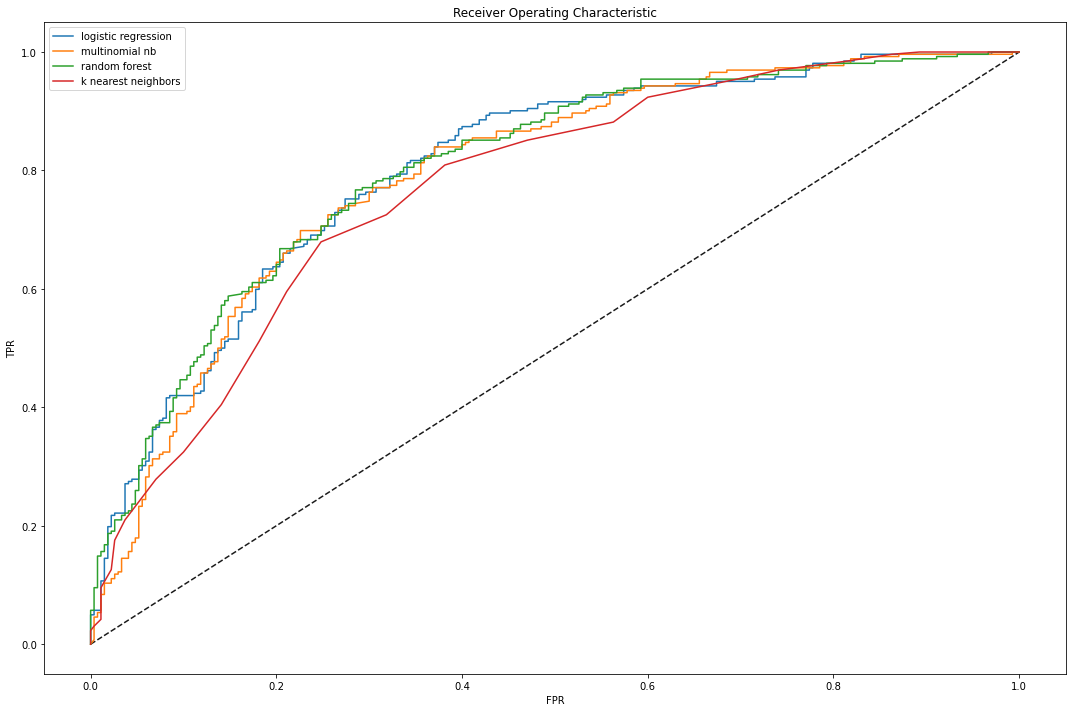

In [40]:
y_pred_prob1 = logreg.predict_proba(logreg_X_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = nb.predict_proba(nb_X_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = rf.predict_proba(rf_X_test)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = knn.predict_proba(knn_X_test)[:, 1]
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

plt.figure(figsize=(15, 10))
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr1, tpr1, label="logistic regression")
plt.plot(fpr2, tpr2, label="multinomial nb")
plt.plot(fpr3, tpr3, label="random forest")
plt.plot(fpr4, tpr4, label="k nearest neighbors")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Receiver Operating Characteristic")

plt.tight_layout()
plt.savefig("images/roc.png", facecolor='w')

### Misclassified Text

Taking a look at the text that was misclassified, we see a mix of: 
* truly misclassified posts 
    - *misclassified as shoestring:* I would love to go outside the country but I know there be just a boat load of restriction everywhere right now so I ’m look for idea of place or inspiration to go in the us . length of trip would be a long weekend to squeeze in between class .



* posts that could belong in both subreddits 
    - I want to solo travel to an asian country that march   for a week , at the beginning of my college vacation ( we get four week of vacation ) . I will finance the trip myself . however , my parent be concern with the possibility that covid restriction might be force at the last minute , and that I end up be stick there for week . they mention a similar case that happen in turkey and morocco . how can I convince they that this risk do not really represent a strong case against my trip ? I do agree that this be a risk , but if we start count all similar risk as a threat , then we would not travel at all . what do you guy think ?



* posts that were posted in the wrong subreddit
    - *posted in solotravel:* I have a lot of time off at the beginning of december . costa rica be an easy/ inexpensive flight .   have be a rough year and I have not exactly treat my body with the good care . so I be look for some kind of wellness retreat in costa rica . I have do ton of research online and the option I be find be more surf / yoga retreat . I be look for body , mind and spirit rejuvenation . clean , healthy eating , exercise , massage and maybe even some one on one therapy . I know place like this exist in india and other place far away from the state but I do not want to deal with + hour of fly each way for just a few week; budget would ideally be around \$, for + day not include airfare



* posts that do not belong in either subreddit
    - where do you move to ? how do you find work ? be it easy to find work ? what be the avg pay rate for a cook where you be ? what be you pay in rent or what percentage of your earning go to rent ? more importantly ; how be life ?
    - I want to travel to all these different country right and experience local place and all . but I be so bad with food . I have such a hard time try new food and I dislike so many thing that be really big in other country like rice . there ’ a lot of country that rice be in almost every meal so I think you can see the issue . anyone else have this issue and what have you do about it ?

In [23]:
# create df for misclassified
results = pd.DataFrame(
    {"text": X_test, "actual": y_test, "pred": rf.predict(rf_X_test)}
)

In [24]:
# for actual = 0 (solotravel) if less than 0, misclassified as shoestring

for i in results[(results.actual - results.pred) < 0]["text"]:
    print(i)
    print("-" * 20)

hey everybody so I ’m go to be in florida for   day from thursday morning - sunday around noon in mid december . I ’m look for some tip on place I should go while I ’m there . here ’ what ’s already in place . I ’m fly into fort lauderdale . I ’ll be stay in florida city and I have a rental car . I want to check out key west and everglades national park . I see that biscayne national park be also near by and I can check that out . miami be not high on my list since I do not plan on party and want to do low risk covid activity , maybe I ’ll pass through or spend a few hour check it out . any suggestion along the line of place to see , thing to do , and food to get would be much appreciate ! thank !
--------------------
you all , I live in nyc and during the peak of winter , nyc be go to be a terrible place as it 'll be super cold and most likely shut down ( to some degree ) because of covid . I be think about get away from january to march and have be look at the caribbean . I would lov

In [25]:
# for actual = 1 (shoestring) if more than 0, misclassified as solotravel

for i in results[(results.actual - results.pred) > 0]["text"]:
    print(i)
    print("-" * 20)

I do not know much about europe , but since I and my bestfriend graduate highschool , in , we 've want to visit multiple european country . we 've hear that sleep in hostel , eat street food , cook basic food in communal hostel kitchen , catch train , and ride bus can help lower your expense alot , but be any of that true ? we plan on go to europe in fall of . we want to be able to visit   different country and spend atleast - day in a city in each country . we have no real itinerary or time limit , and be only travel for the natural scenery , architecture , and overall experience ; so what place we visit do not really matter too much to we as it would all be different from what we normally experience in our small hometown . we also plan on rough it out in certain city to stretch our money a bit far ; we do not mind do it because we have to do it before when we stay in new york for two week . our trip be still in the early stage of planning , so any and all advice be welcome and greatl

<a id='link5'></a>

## Conclusion

To summarize, in the first notebook we scraped data from 2 subreddits: r/solotravel and r/shoestring. After which we created a lemmatized text column and ran 5 models on these columns to examine if we are able to classify them into their original subreddits. 

We first ran a gridsearch to find the best parameters for both CountVectorizer and TFIDFVectorizer, before remodelling with these parameters. 

The model that performed well with respect to our problem statement is: Random Forest with a CountVectorizer. It returned an accuracy score of 73.7% on our test data.

### Recommendations

Although our accuracy scores for our model wasn't particularly high, we have still gained valuable insight. 

1) Perhaps the 2 subreddits are not at all that different from each other, and could be combined into 1 subreddit for solo travel. The distinction between the 2 subreddits can also be seen when we look at misclassified text, there were a couple of instances where posts could belong to either subreddit.

2) To explore grouping the portal tags by 'travel type' instead - for example by solo or group travel. 

    - Could there be a correlation between solo travel and budget travel? 

### Future Improvements

- Experimenting with different train and test splits to deal with model overfitting
- Try modelling with XGBoost to see if it returns better results (first model took 7H to run)
- Explore relationship between different types of travellers (solo or group) and what their considerations are
- Sub-categorizing posts into regions (e.g. Europe, South East Asia) to help in faster, more targeted information search  